# Hito 1 Minería de Datos (CC5205)

Integrantes: 
- Matías Torres N.
- Andrea Trigo D.
- Tomás Araya.lvarÁ Garrido B.do.
- Sebastián Morales C.  
![Portada de Anime](anime_portada.jpg)

## Índice
- [Introducción](#introducción)
- [Limpieza de los datasets](#limpieza-de-los-datasets)
  - [Dataset `anime_cleaned.csv`](#dataset-anime_cleanedcsv)
  - [Dataset `users_cleaned.csv`](#dataset-users_cleanedcsv)
  - [Dataset `animelists_cleaned.csv`](#dataset-animelists_cleanedcsv)
- [Exploración de datos](#exploración-de-datos)
  - [Dataset Animelists](#dataset-animelists)
  - [Dataset Anime](#dataset-anime)
  - [Dataset Users](#dataset-users)
- [Preguntas y problemas](#preguntas-y-problemas)
  - [Consulta 1](#consulta-1-top-20-animes-mejor-y-peor-evaluados)
  - [Consulta 2](#consulta-2-dispersión-de-las-edades-de-usuarios-en-un-género-de-anime-específico)
  - [Consulta 3](#consulta-3-más-animes-mos-droppeados)
  - [Consulta 4](#consulta-4-estudios-más-populares-en-el-top-100)
  - [Consulta 5](#consulta-5-top-animes-con-más-capitulos)
- [Conclusión](#conclusión)
- [Bibliografía](#bibliografía)

## Introducción
El mundo del anime es una de las industrias de entretenimiento más grandes en todo el mundo. Su
popularidad ha crecido de forma estrepitosa en los últimos años, lo que ha llevado a que cada vez
haya más series de anime y usuarios que consumen estos. Además, hay una gran cantidad de datos
disponibles sobre los animes, desde información básica como los títulos y las fechas de lanzamiento,
hasta otras más específicas como las horas vistas y la información demográfica, entre otros.

El contexto general del tema de estudio se centra en el análisis de un conjunto de datos sobre animes
y los “otakus” (fanáticos de la cultura japonesa) que visualizan este contenido. Este conjunto de
datos es una muestra representativa de la comunidad otaku en Internet, y su objetivo es analizar la
demografía y las tendencias dentro de este grupo. Contiene información sobre los usuarios (género,
ubicación, fecha de nacimiento, etc.), sobre los animes (fecha de emisión, géneros, productores,
etc.) y las listas de animes que los usuarios han creado en MyAnimeList, incluyendo su estado de
visualización (plan para ver, completado, viendo, abandonado, etc.) y la puntuación que le han
dado en una escala del 1 al 10.

Estudiar estos datos es interesante por varias razones. Primeramente, para generar un análisis
demográfico y comprender la composición demográfica de la comunidad otaku, como la distribución
por género, edad y ubicación geográfica, lo que nos puede proporcionar información valiosa sobre
los intereses y preferencias de este grupo según atributos en común. Además, podemos ver las
tendencias y patrones de consumo, donde, al analizar las listas de animes y las calificaciones de
los usuarios, es posible identificar tendencias y patrones en el consumo de animes. Esto puede
ayudar a descubrir qué tipos de animes son más o menos populares, cuáles tienen una mayor tasa
de finalización y cuáles son más propensos a ser abandonados, lo que nos permite además, poder
investigar cómo influyen las características de un anime (género, productor, fecha de emisión, etc.)
en su popularidad y calificación, lo que nos puede proporcionar información útil para los creadores
de contenido y los estudios de producción de animes.

## Limpieza de los datasets

A continuación se explica el contenido de cada dataset, que representa cada una de sus columnas y el porque decidimos eliminar parte de la información en cada uno:

### Dataset ```anime_cleaned.csv```
- ```anime_id```: un identificador único asignado a cada anime en el dataset.
- ```title```: el título del anime en su idioma original (no necesariamente en japonés).
- ```title_english```: el título del anime en inglés (si está disponible)
- ```title_japanese```: el título del anime en japonés (si está disponible).
- ```title_synonyms```: otros títulos alternativos o sinónimos para el anime (si están disponibles).
- ```image_url```: la URL de una imagen relacionada con el anime (como un póster o una captura de pantalla).
- ```type```: el tipo de anime (por ejemplo, TV, OVA, película, etc.).
- ```source```: la fuente original del anime (por ejemplo, manga, novela ligera, etc.).
- ```episodes```: el número total de episodios del anime.
- ```status```: el estado actual del anime (por ejemplo, en emisión, finalizado, cancelado, etc.).
- ```airing```: indica si el anime está actualmente en emisión o no.
- ```aired_string```: la fecha de emisión del anime en un formato de texto legible por humanos.
- ```aired```: la fecha de emisión del anime en formato de fecha.
- ```duration```: la duración promedio de cada episodio del anime.
- ```rating```: la clasificación de edad recomendada para el anime.
- ```score```: la puntuación del anime según los usuarios del sitio web MyAnimeList en escala 1 a 10.
- ```scored_by```: la cantidad de usuarios que han puntuado el anime.
- ```rank```: la posición del anime en el ranking de popularidad de MyAnimeList.
- ```popularity```: la popularidad del anime según los usuarios del sitio web MyAnimeList.
- ```members```: la cantidad de usuarios que han agregado el anime a su lista en MyAnimeList.
- ```favorites```: la cantidad de usuarios que han marcado el anime como uno de sus favoritos en MyAnimeList.
- ```background```: información adicional o curiosidades sobre el anime.
- ```premiered```: la fecha de estreno del anime en Japón.
- ```broadcast```: el día y horario de emisión del anime en Japón.
- ```related```: información sobre otros anime relacionados con este.
- ```producer```: la compañía que produjo el anime.

Realizando un analisis, se decidió por omitir las siguientes columnas `image_url`, `background`, `related`, `premiered`, `broadcast`,`opening_theme`, `ending_theme`, `title_english`, `title_japanese`, `title_synonyms`,`airing`, `aired_string`, `licensor`, `producer`.

Las columnas `image_url`, `background`, `related`, `opening_theme` y `ending_theme` contienen información que no es necesariamente relevante para un análisis general del anime. La URL de la imagen y la información de fondo son datos auxiliares que no influyen en las características principales del anime. La información relacionada puede ser útil, pero puede ser redundante o generar una gran cantidad de datos duplicados.

Las columnas `title_english`, `title_japanese` y `title_synonyms` son redundantes porque todas ellas proporcionan información sobre el título del anime en diferentes idiomas. Para un análisis general, es suficiente con tener una sola columna con el título.

La columna `airing` solo indica si el anime está en emisión o no, lo cual ya está incluido en la columna `status`. La columna `aired_string` proporciona la fecha de emisión de cada episodio en formato de texto, pero esta información también se puede obtener a partir de la columna `aired` (en formato de fecha) y la columna 'duration' (en minutos).


### Dataset ```users_cleaned.csv```
- `username`: el nombre de usuario del perfil de un usuario en el sitio web de anime.
- `user_id`: un identificador único asignado a cada usuario en el sitio web de anime.
- `user_watching`: la cantidad de anime que el usuario está actualmente viendo.
- `user_completed`: la cantidad de anime que el usuario ha completado.
- `user_onhold`: la cantidad de anime que el usuario ha puesto en espera temporalmente.
- `user_dropped`: la cantidad de anime que el usuario ha abandonado antes de completar.
- `user_plantowatch`: la cantidad de anime que el usuario planea ver en el futuro.
- `user_days_spent_watching`: la cantidad de días que el usuario ha pasado viendo anime.
- `gender`: el género del usuario.location: la ubicación geográfica del usuario.
- `birth_date`: la fecha de nacimiento del usuario.
- `access_rank`: el nivel de acceso del usuario en el sitio web de anime.
- `join_date`: la fecha en que el usuario se unió al sitio web de anime.
- `last_online`: la fecha y hora en que el usuario estuvo en línea por última vez en el sitio web de anime.
- `stats_mean_score`: la puntuación media otorgada por el usuario a los anime que ha visto.
- `stats_rewatched`: la cantidad de veces que el usuario ha vuelto a ver anime que ya ha completado.
- `stats_episodes`: la cantidad total de episodios de anime que el usuario ha visto en su vida.

Realizando un análisis se decidió eliminar las siguientes columnas `location`, `access_rank`.

La columna `location` se eliminó debido a que estaba muy mal formateada, contenía valores sin sentido.

La columnna `access_rank` se eliminó debido a que no contenía data importante para analizar y sacar conclusiones a partir de esta.


### Dataset `animelists_cleaned.csv`
- `username`: el nombre de usuario del usuario que completó la entrada para ese anime.
- `anime_id`: un identificador único para cada anime en el dataset.
- `my_watched_episodes`: la cantidad de episodios que el usuario ha visto del anime.
- `my_start_date`: la fecha en que el usuario comenzó a ver el anime.
- `my_finish_date`: la fecha en que el usuario terminó de ver el anime.
- `my_score`: la puntuación que el usuario dio al anime (de 1 a 10).
- `my_status`: el estado actual del anime para el usuario (en curso, completado, en espera, abandonado, etc.).
- `my_rewatching`: si el usuario está viendo el anime por segunda vez o más (1 para sí, 0 para no).
- `my_rewatching_ep`: la cantidad de episodios que el usuario ha visto en su rewatch.
- `my_last_updated`: la fecha en que el usuario actualizó su registro de anime para este anime.
- `my_tags`: las etiquetas que el usuario ha asociado con este anime (por ejemplo, "acción", "comedia", "romance", "favoritos", etc.).


Realizando un análisis de este dataset se decidió eliminar las siguientes columnas: `my_start_date`, `my_finish_date`, `my_tags`, `my_last_updated`.

Se eliminó las columnas `my_start_date` y `my_finish_date` debido a que el análisis no depende del tiempo que los usuarios requirieron para ver un anime en especifico, además de que hay muchos datos faltantes.

Se eliminó la columna `my_tags` debido a que ya está presente en otro dataset.

Se eliminó la columna `my_last_updated` debido a que no aporta información relevante para el análisis.



### Exploración de datos

Mencionado lo anterior, se procede a calcular las dimensiones de cada dataframe, los tipos de los datos de cada columna y las estadisticas (promedio, moda, mediana, cuartiles, ...) de las columnas de tipo numerico. Además se filtran las columnas que presentan una cantidad considerable de nulos.

In [13]:
# importación de pandas para gráfico de tablas y seaborn para mapa de calor de correlación
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# definimos que pandas imprima todas las columnas al mostrar un dataframe
pd.set_option('display.max_columns', None)


In [14]:
# importanción de anime y users (tablas relativamente cortas)
anime = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')

In [15]:
# la imporanción de animelists es un poco más lenta
# por lo que se realiza en otra celda
animelists = pd.read_csv('animelists_cleaned.csv')

### Dataset Animelists

In [16]:
# ordenamos los usuarios por nombre de usuario alfabéticamente
animelists = animelists.sort_values(by='username')

In [17]:
# eliminamos los usuarios que no tienen nombre de usuario
animelists = animelists.dropna(subset=['username'])

In [18]:
# eliminamos las columnas que no nos interesan (explicado anteriormente)
animelists = animelists.drop(columns=[
    'my_start_date', 'my_finish_date', 'my_tags', 'my_last_updated'
    ])

In [19]:
# mostramos las columnas del dataframe final
animelists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31283787 entries, 6740075 to 6085121
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_score             int64  
 4   my_status            int64  
 5   my_rewatching        float64
 6   my_rewatching_ep     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ GB


In [20]:
# mostramos las características generales del dataframe
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128379e+07,3.128379e+07,3.128379e+07,3.128379e+07,2.440557e+07,3.128379e+07
mean,1.170324e+04,1.289617e+01,4.652314e+00,3.008110e+00,7.903113e-04,1.833008e-01
std,1.134843e+04,3.733389e+01,3.931616e+00,1.730421e+00,2.810137e-02,1.009176e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


###  Dataset Anime

In [21]:
# eliminamos las columnas que no nos interesan (explicado anteriormente)
anime = anime.drop(columns=[
    'image_url', 'background', 'related', 'premiered', 'broadcast',
    'opening_theme', 'ending_theme', 'title_english', 'title_japanese', 'title_synonyms',
    'airing', 'aired_string', 'licensor', 'producer'
    ])

In [22]:
# mostramos las columnas del dataframe final
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   type             6668 non-null   object 
 3   source           6668 non-null   object 
 4   episodes         6668 non-null   int64  
 5   status           6668 non-null   object 
 6   aired            6668 non-null   object 
 7   duration         6668 non-null   object 
 8   rating           6586 non-null   object 
 9   score            6668 non-null   float64
 10  scored_by        6668 non-null   int64  
 11  rank             6312 non-null   float64
 12  popularity       6668 non-null   int64  
 13  members          6668 non-null   int64  
 14  favorites        6668 non-null   int64  
 15  studio           6668 non-null   object 
 16  genre            6664 non-null   object 
 17  duration_min  

In [23]:
# mostramos las características generales del dataframe
anime.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


### Dataset Users

In [24]:
# eliminamos las columnas que no nos interesan (explicado anteriormente)
users = users.drop(columns=["location", "access_rank"])

In [25]:
# generamos una nueva columna con la edad del usuario en base a su fecha de nacimiento
users['age'] = 2018 - users['birth_date'].str[:4].astype(int)

In [26]:
# mostramos las columnas del dataframe final
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   birth_date                108711 non-null  object 
 10  join_date                 108711 non-null  object 
 11  last_online               108711 non-null  object 
 12  stats_mean_score          108711 non-null  float64
 13  stats_rewatched           108711 non-null  f

In [27]:
# mostramos las características generales del dataframe
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes,age
count,1.087110e+05,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000
mean,1.817687e+06,14.767503,196.458178,11.388167,11.733716,75.578589,61.913873,7.747612,14.197993,3779.871255,25.125820
std,1.998269e+06,32.746591,244.945751,30.830825,30.978991,178.653664,59.211762,1.451368,55.376799,3678.336729,4.632399
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000,10.000000
25%,1.994345e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.066319,7.330000,0.000000,1269.500000,22.000000
50%,5.675030e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.190278,7.890000,1.000000,2797.000000,25.000000
75%,3.477036e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.461806,8.460000,10.000000,5135.000000,28.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000,49.000000


## Consultas sobre el dataset

Para entender mejor los datos de nuestro proyecto, generamos las siguientes consultas, de las cuales derivarán las preguntas a realizar en los siguientes hitos.

### Consulta 1:  Top 20 animes mejor y peor evaluados

Se crean dos gráficos que muestran los top 20 animes mejor y peor evaluados. Se filtran aquellos animes que han sido evaluados menos de 24000 veces, siendo este último valor una aproximación del promedio de la cantidad de evaluaciones que reciben los animes en este dataset.

Text(0, 0.5, 'Puntaje')

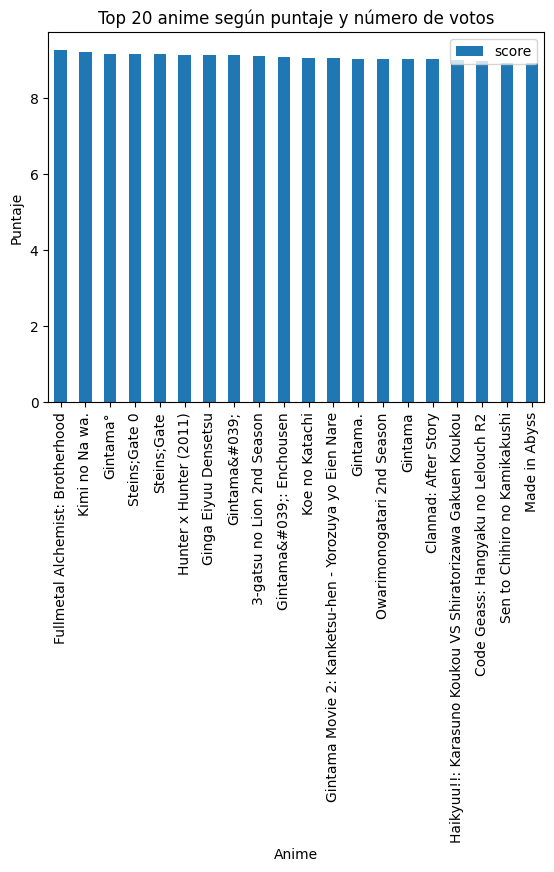

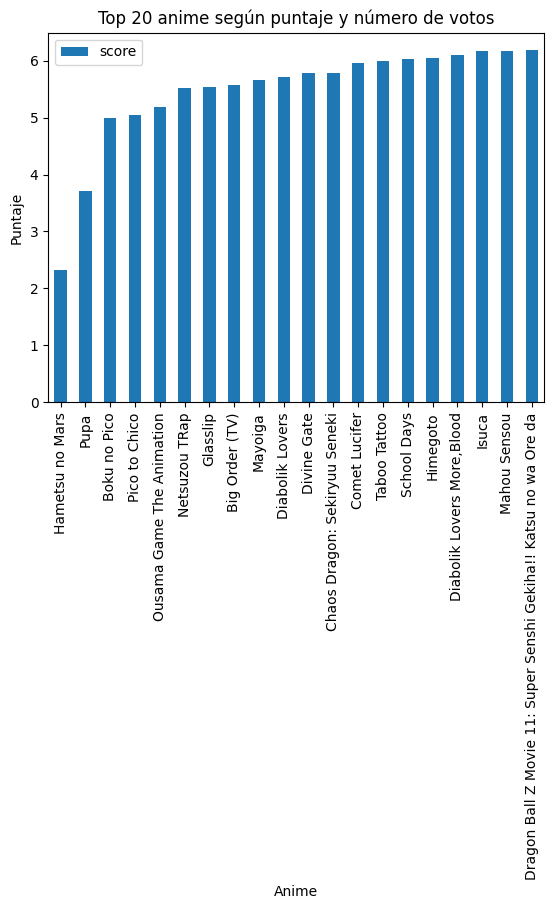

In [28]:
#Data set ordenado por popularidad

anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] > 24000] 
anime_top_asc = anime1.sort_values('score', ascending=False)
anime_top_asc = anime_top_asc.head(20)

#Grafico 20 mejor evaluados
anime_top_asc.plot(x='title', y='score', kind='bar')
plt.title('Top 20 anime según puntaje y número de votos')
plt.xlabel('Anime')
plt.ylabel('Puntaje')


#Grafico 20 peor evaluados
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(20) 
anime_top_des.plot(x='title', y='score', kind='bar')
plt.title('Top 20 anime según puntaje y número de votos')
plt.xlabel('Anime')
plt.ylabel('Puntaje')


### Consulta 2: Dispersión de las edades y género de usuarios en un género de anime específico.

Se filtra la lista de animes primero por el género ```Shounen``` y luego por ```Shoujo```, para ver las características predominantes de los usuarios que consumen estos tipos de anime. El género ```Shounen``` es un término japonés que se refiere a los mangas y animes dirigidos principalmente a un público masculino joven, mientras que el género ```Shoujo``` se refiere a lo mismo, pero dirigidos a un público femenino joven. Para nuestra consulta y análisis, visualizamos los datos de cantidad de usuarios por edad que ven cada tipo de ánime y la cantidad de usuarios por género que ven cada estilo de ánime. De esta manera, podemos generar análisis y conclusciones a partir la distribución de edad e identidad de genero de estos tópicos de anime en específicoé

Text(0, 0.5, 'Cantidad de usuarios')

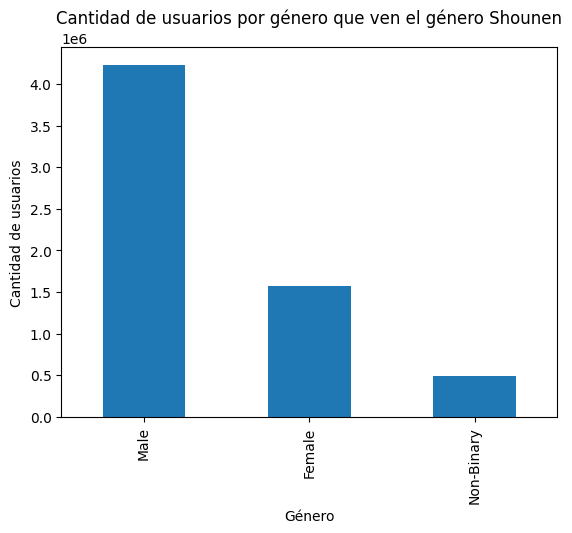

In [29]:
#Shounen
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]
anime_shounen = anime.dropna(subset=['genre'])
anime_shounen = anime_shounen[anime_shounen['genre'].str.contains('Shounen')]
animelists2 = animelists2.merge(anime_shounen, on='anime_id', how='inner')
animelists2 = animelists2.merge(users, on='username', how='inner')
animelists2 = animelists2[animelists2['my_watched_episodes'] > 0]

# grafico de cantidad de usuarios por edad que ven el genero shounen
animelists2['age'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por edad que ven el género Shounen')
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')
plt.show()

# grafico de cantidad de usuarios por genero que ven el genero shounen
animelists2['gender'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por género que ven el género Shounen')
plt.xlabel('Género')
plt.ylabel('Cantidad de usuarios')
plt.show()

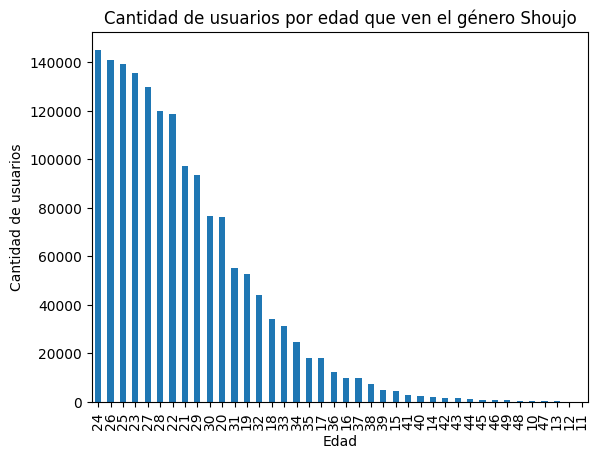

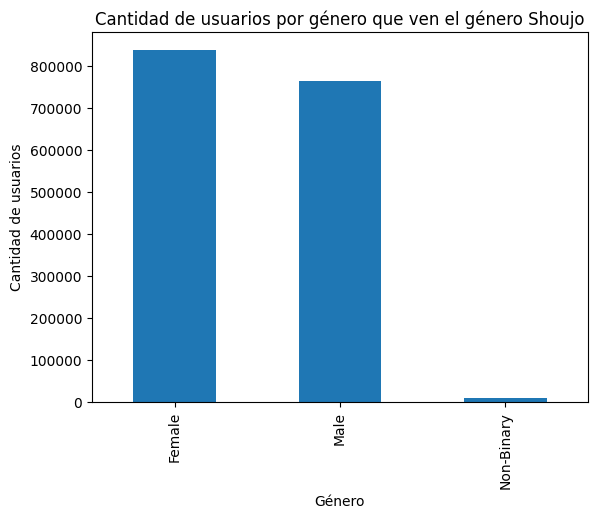

In [35]:
#Shoujo
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]
anime_shoujo = anime.dropna(subset=['genre'])
anime_shoujo = anime_shoujo[anime_shoujo['genre'].str.contains('Shoujo')]
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]
animelists2 = animelists2.merge(anime_shoujo, on='anime_id', how='inner')
animelists2 = animelists2.merge(users, on='username', how='inner')
animelists2 = animelists2[animelists2['my_watched_episodes'] > 0]

# grafico de cantidad de usuarios por edad que ven el genero Shoujo
animelists2['age'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por edad que ven el género Shoujo')
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')
plt.show()

# grafico de cantidad de usuarios por genero que ven el genero Shoujo
animelists2['gender'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por género que ven el género Shoujo')
plt.xlabel('Género')
plt.ylabel('Cantidad de usuarios')
plt.show()

### Consulta 3: Animes más droppeados

Para esta consulta, nos enfocamos en encontrar los animes más dropeados y nos preguntamos si es posible predecir qué animes tienen más probabilidades de ser abandonados por los usuarios en función de sus características. Visualizamos los datos en un gráfico de puntos que muestra los 10 animes más dropeados por cantidad de episodios, en un rango de 0 a 500. De esta manera, pudimos comenzar a explorar la relación entre características y la tendencia a ser abandonado por los usuarios, donde nuestro análisis nos permitió identificar ciertas características que podrían estar relacionadas con la tendencia de un anime a ser dropeado.

In [38]:
#Data frame con animes mas dropeados

anime_dropped = animelists[['anime_id', 'my_status']] #proyeccion sobre datos significativos
anime_dropped = anime_dropped[anime_dropped['my_status'] == 4] #se dejan solo los dropeados
count_dropped = anime_dropped['anime_id'].value_counts(dropna=True, sort=True) #se cuentan las repeticiones del id
count_dropped = count_dropped.rename_axis('anime_id').to_frame('counts') #se convierte en un dataframe
anime_names = anime[['title','anime_id','score','genre', 'episodes']]
count_dropped = count_dropped.merge(anime_names, on='anime_id', how='inner') #se obtienen los nombres a partir del id
count_dropped.head(20) #primeros 20

,anime_id,counts,title,score,genre,episodes
0,269,11807,Bleach,7.90,"Action, Adventure, Comedy, Super Power, Supern...",366
1,1735,9424,Naruto: Shippuuden,8.18,"Action, Adventure, Comedy, Super Power, Martia...",500
2,20,7247,Naruto,7.88,"Action, Adventure, Comedy, Super Power, Martia...",220
3,21,6696,One Piece,8.54,"Action, Adventure, Comedy, Super Power, Drama,...",0
4,6702,6094,Fairy Tail,8.08,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",175
5,527,4120,Pokemon,7.42,"Action, Adventure, Comedy, Kids, Fantasy",276
6,249,3748,InuYasha,7.90,"Action, Adventure, Comedy, Historical, Demons,...",167
7,1887,3371,Lucky☆Star,7.83,"Slice of Life, Comedy, Parody, School",24
8,1482,3199,D.Gray-man,8.16,"Action, Adventure, Comedy, Super Power, Demons...",103
9,3588,3127,Soul Eater,8.03,"Action, Fantasy, Comedy, Supernatural, Shounen",51


(0.0, 150.0)

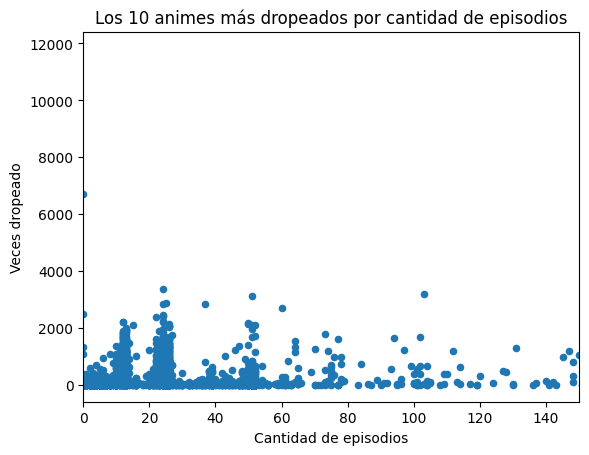

In [39]:
# graficamos los 10 animes más dropeados por cantidad de episodios
# en un gráfico de puntos en el rango 0-500

count_dropped.plot(x='episodes', y='counts', kind='scatter')
plt.title('Los 10 animes más dropeados por cantidad de episodios')
plt.xlabel('Cantidad de episodios')
plt.ylabel('Veces dropeado')
plt.xlim(0, 150)
plt.show()

<Axes: >

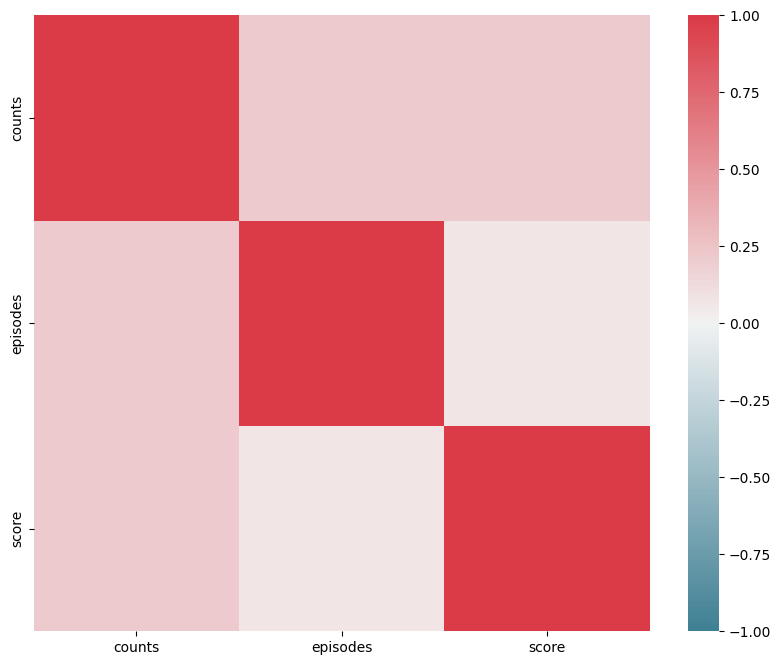

In [41]:
# Mapa de correlacion

f, ax = plt.subplots(figsize=(10, 8))
corr = count_dropped[['counts', 'episodes', 'score']].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

### Consulta 4: Estudios más populares en el top 100

Para esta consulta, nos enfocamos en encontrar los 100 animes más populares y buscar cuáles son los estudios de animación japonesa que más se repiten en ellos. Visualizamos los datos en un gráfico que muestra los estudios de los 100 animes más populares, lo que nos permitió identificar los estudios de animación japonesa que producen los animes más populares y comenzar a explorar su relación con la popularidad de los diferentes animes, donde nuestro análisis nos permite tratar de identificar ciertos patrones y tendencias en cuanto a los estudios de animación japonesa que producen los animes más populares.

Text(0, 0.5, 'Cantidad de animes')

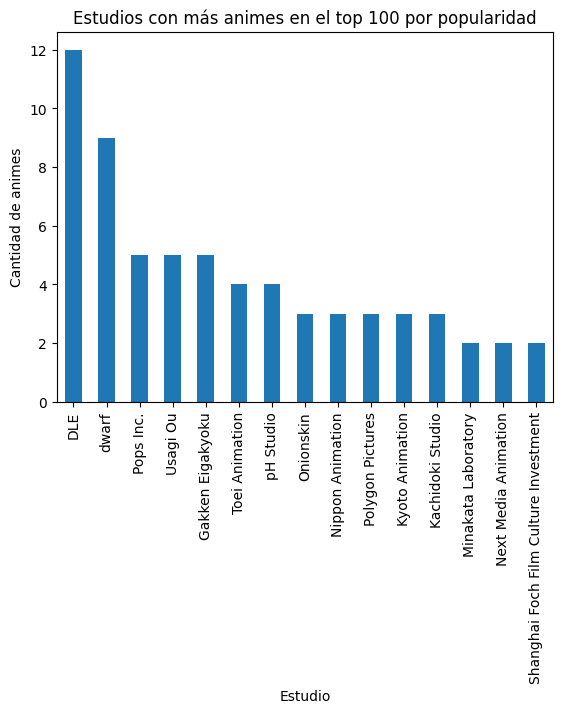

In [42]:
# grafica los estudios de los 100 animes más populares

anime = anime.sort_values('popularity', ascending=False)
anime_top100 = anime.head(100)
anime_top100 = anime_top100['studio'].value_counts()
anime_top100[anime_top100 > 1].plot(kind='bar')

# Grafico de los estudios con más animes en el top 100 de popularidad

plt.title('Estudios con más animes en el top 100 por popularidad')
plt.xlabel('Estudio')
plt.ylabel('Cantidad de animes')


### Consulta 5: top animes con más capitulos

Text(0, 0.5, 'Num episodios')

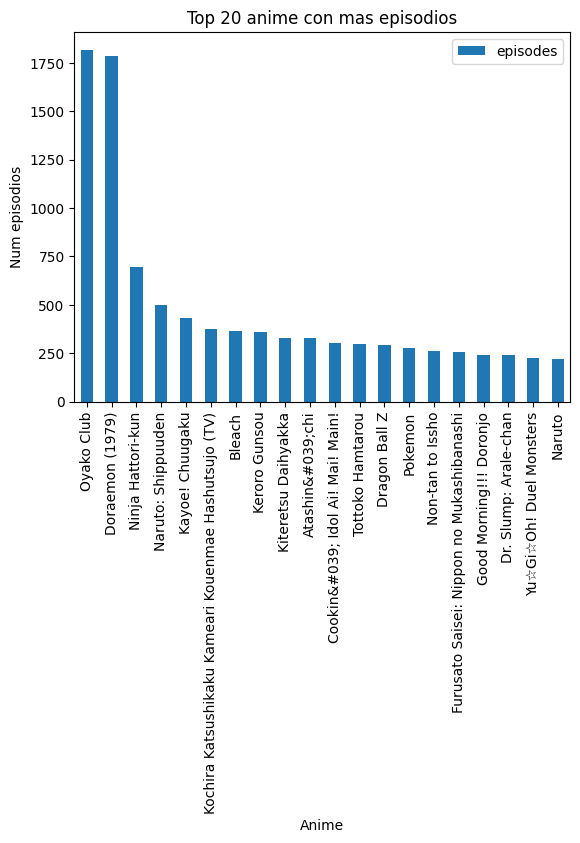

In [43]:
anime2 = anime[["title", "episodes", ]]
anime2 = anime2.sort_values('episodes', ascending=False)
anime2 = anime2.head(20)

anime2.plot(x='title', y='episodes', kind='bar')
plt.title('Top 20 anime con mas episodios')
plt.xlabel('Anime')
plt.ylabel('Num episodios')

## Preguntas y problemas

Después de realizar un analisis a la base de datos, nos planteamos las siguientes preguntas:

A partir de las consultas 1 y 4 relacionadas a la popularidad y calificación de los animes nos planteamos la siguiente pregunta: 

- ¿Es posible predecir las calificaciones de un anime en función de características como género, productor y fecha de emisión?

Por otra parte, en cuanto a la consulta sobre la dispersión de las edades y género de usuarios en un género de anime específico, nos surge la duda si esto es generalizable para distintos generos, por lo que nos planteamos la siguiente pregunta:

- ¿Existen asociaciones frecuentes entre ciertos géneros de animes y características demográficas de los usuarios, como género, grupo etario?

A partir del mapa de correlación sobre la cantidad de veces que los animes han sido droppeados, nos interesa seguir investigando sobre las posibles causas que podrían explicar el desinteres sobre algunos animes:

- ¿Es posible predecir qué animes tienen más probabilidades de ser abandonados por los usuarios en función de características como género, productor y fecha de emisión?

Finalmente, con respecto top de animes con más capitulos, es de nuestro interés 

- Consulta 5: top animes con más capitulos -> existe alguna relacion entre la "fama" de estos animes con la cantidad de capitulos, si un anime tiene mas capitulos es mas famoso?

## Conclusión

El dataset presentado tiene un gran potencial para poder responder preguntas que podrían ayudar a mejorar sistemas de recomendación en páginas de anime, entender las características más relevantes de los animes más dropeados y los más populares para predecir si un anime recién estrenado será mainstream o lo gente lo dejará de ver a los pocos capítulos, entre otros aportes significativos que esperamos responder en los próximos hitos.

## Contribución de cada integrante

- 

## Bibliografía

[Matěj Račinský, “MyAnimeList Dataset.” Kaggle, 2018, doi: 10.34740/KAGGLE/DSV/45582](https://www.kaggle.com/datasets/azathoth42/myanimelist?select=anime_cleaned.csv)